<a href="https://colab.research.google.com/github/mzk8888/HTML-select/blob/main/Quantum_Machine_Learning_and_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import torch

In [ ]:
import numpy as np
x = - 2.5 + 5.0*np.random.rand(100)

In [ ]:
t = np.sin(x) + 0.01*np.random.randn(100)

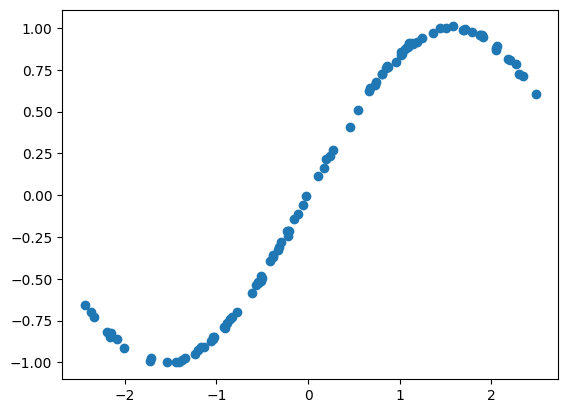

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,t)
plt.show()

In [ ]:
xdata = x.reshape(100,1)
tdata = t.reshape(100,1)
xdata = torch.tensor(xdata, dtype=torch.float32)
tdata = torch.tensor(tdata, dtype=torch.float32)

In [ ]:
dataset = torch.utils.data.TensorDataset(xdata, tdata)

In [ ]:
n_train = int(len(dataset) * 0.8)
n_test = len(dataset) - n_train

In [ ]:
print(n_train, n_test)

80 20


In [ ]:
train_set, test_set = torch.utils.data.random_split(dataset, [n_train, n_test])

In [ ]:
batch_size = 10

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = False)

In [ ]:
import torch.nn as nn

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.sig = nn.Sigmoid()
    self.fc1 = nn.Linear(1,2)
    self.fc2 = nn.Linear(2,1)
  def forward(self, x):
      h = self.fc1(x)
      h = self.sig(h)
      y = self.sig(h)
      return y

In [ ]:
import torch.optim as optim

In [ ]:
net = NN()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

In [ ]:
train_loss_value=[]
test_loss_value=[]

In [ ]:
Tall = 500

In [ ]:
for epoch in range(Tall):
  sum_loss = 0
  for batch in train_loader:
    optimizer.zero_grad()
    xtrain,ttrain = batch
    ytrain = net(xtrain)
    loss = criterion(ytrain, ttrain)
    loss.backward()
    optimizer.step()
    sum_loss += loss.item()
    train_loss_value.append(sum_loss/len(train_loader))
    sum_loss = 0
  for batch in test_loader:
    xtest, ttest = batch
    ytest = net(xtest)
    loss = criterion(ytest, ttest)
    sum_loss += loss.item()
    test_loss_value.append(sum_loss/len(test_loader))

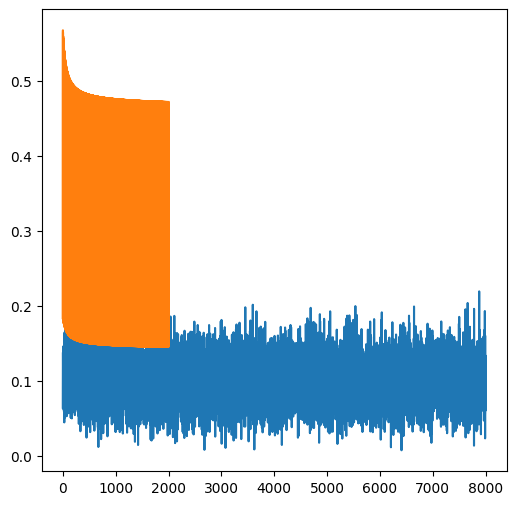

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(range(len(train_loss_value)), train_loss_value)
plt.plot(range(len(test_loss_value)), test_loss_value)

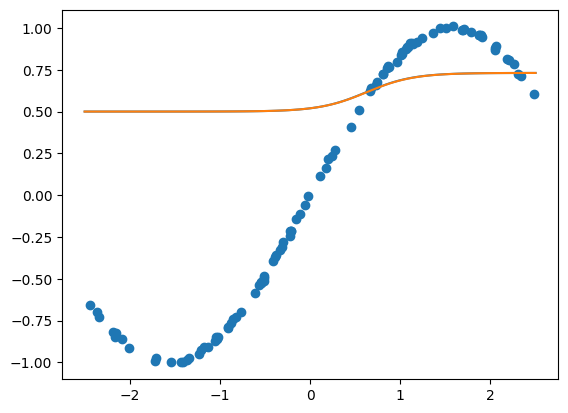

In [ ]:
xplot = np.linspace(-2.5,2.5,100).reshape(100,1)
xplot = torch.tensor(xplot, dtype=torch.float32)
net = net.cpu()
yplot = net.forward(xplot)
plt.plot(xplot.detach().numpy().copy(), yplot.detach().numpy().copy())
plt.scatter(x,t)
plt.show()

In [ ]:
import torchvision

In [ ]:
trans = torchvision.transforms.ToTensor()

In [ ]:
train_set = torchvision.datasets.MNIST(root = 'path', train = True, download = True, transform = trans)

100%|██████████| 9912422/9912422 [00:00<00:00, 153653476.20it/s]

Extracting path/MNIST/raw/train-images-idx3-ubyte.gz to path/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 49302276.69it/s]


Extracting path/MNIST/raw/train-labels-idx1-ubyte.gz to path/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46265094.57it/s]

Extracting path/MNIST/raw/t10k-images-idx3-ubyte.gz to path/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5355785.43it/s]

Extracting path/MNIST/raw/t10k-labels-idx1-ubyte.gz to path/MNIST/raw



In [ ]:
print(train_set[0][0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

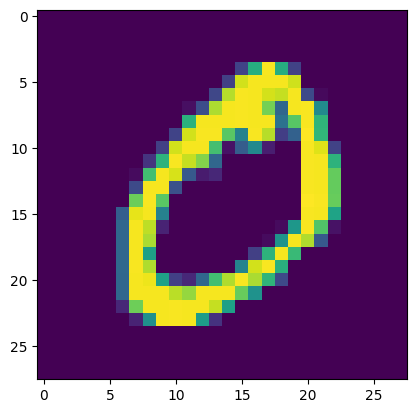

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_set[1][0][0])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)

In [ ]:
test_set = torchvision.datasets.MNIST(root = 'path', train = False, download = True, transform = trans)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 100, shuffle = False)

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, stride=2)
    self.conv1 = nn.Conv2d(1,16,3)
    self.conv2 = nn.Conv2d(16,32,3)
    self.fc1 = nn.Linear(32 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 10)
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    x = x.view(x.size()[0], -1)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

In [ ]:
device = torch.device("cuda:0")
net = NN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [ ]:
train_loss_value=[]
train_acc_value=[]
test_loss_value=[]
test_acc_value=[]

In [ ]:
Tall = 10

In [ ]:
for epoch in range(Tall):
  sum_loss = 0
  sum_acc = 0
for batch in train_loader:
  xtrain,ttrain = batch
  optimizer.zero_grad()
  ytrain = net(xtrain)
  ylabel = torch.argmax(ytrain, dim=1)
  acc = torch.sum(ylabel == ttrain)/len(ttrain)
  loss = criterion(ytrain, ttrain)
  loss.backward()
  optimizer.step()
  sum_loss += loss.item()
  sum_acc += acc.item()
  train_loss_value.append(sum_loss/len(train_loader))
  train_acc_value.append(sum_acc/len(train_loader))
  sum_loss = 0
  sum_acc = 0
for batch in test_loader:
  xtest, ttest = batch
  optimizer.zero_grad()
  ytest = net(xtest)
  ylabel = torch.argmax(ytest, dim=1)
  acc = torch.sum(ylabel == ttest)/len(ttest)
  loss = criterion(ytest, ttest)
  sum_loss += loss.item()
  sum_acc += acc.item()
  test_loss_value.append(sum_loss/len(test_loader))
  test_acc_value.append(sum_acc/len(test_loader))

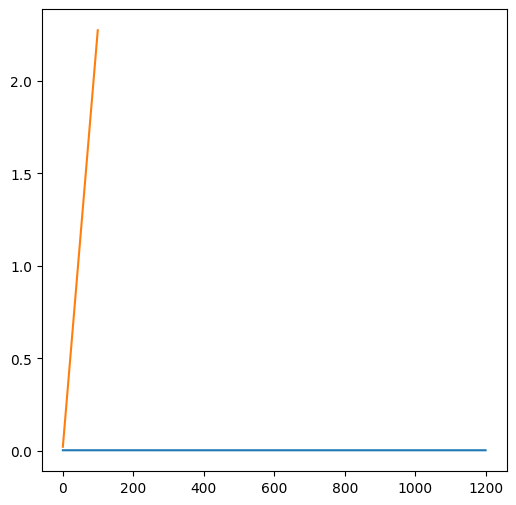

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(range(len(train_loss_value)), train_loss_value)
plt.plot(range(len(test_loss_value)), test_loss_value)

(0.0, 1.01)

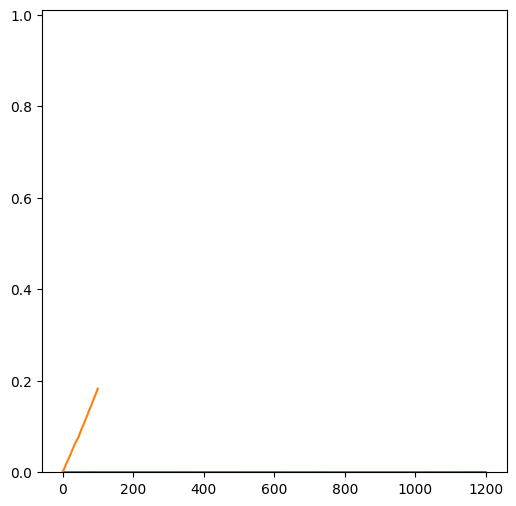

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(range(len(train_acc_value)), train_acc_value)
plt.plot(range(len(test_acc_value)), test_acc_value)
plt.ylim([0,1.01])